$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $


# Quantum simulation of Unruh Tempreature.

### Introduction
#### Step 1:
First we need to determine the coupling frequancy ``` g ' ```  as a function of an characteristic acceleration  $A_{ch} $ ,fixing $g\,'$ and varing the number of maximum excited atomes $N_{e}$ (phononic excitation) going to give rise to the driven simulated acceleration. 

We have found that:  $g\,'=\frac{\sigma A_{ch} }{2c}$.
Where: 
-$\sigma = \ln\coth(\frac{\pi}{4}\Delta n)$
and:
-$\Delta n = \frac{e^{\frac{\pi}{2}}}{e^{\pi}-1}$
#### Step 2:
Now since we have ```g ' ``` we can generate the hamiltonian that characterise  the simulator for various number of possible maximum possible (phononic excitations) excited atomes.
#### Step 3:
Next we estimate  the eigenspectrum of this hamiltonian numerically  through  ```qutip```.
#### Step 4:
Then we compute the heat capacity with the help of the tools of the density operator formalism and statistical mechanics, and we can also estimate the expectation value of the number operator using ```qutip.mesolve ``` module.
#### Step 5 :
Finally we check the hypothesise stated in the paper and simulating the Unruh tempreature through the connection between the critical tempreature and the averger number of the phononic excitation  of these Bose-Eienstein thermal baths $T_{c}\propto \bar{n}_{c}$, where $\bar{n}_{c}\equiv\bar{n}\,(T_{c}) $. 


First of all in order to excute this notebook, you need to install qutip through the follwing commend ``` pip install qutip ``` and import the necessary packages.

### Package Importing 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Qobj, thermal_dm
from qutip import expect, tensor, sigmax, sigmay, sigmaz, qeye, sesolve, mesolve, fock, destroy, create, Bloch

### Constants defining /Tuned Coupling Frequancy

In [2]:
# constants
sd_nexatome=np.sqrt(np.exp(np.pi)/((np.exp(np.pi)-1)**2))  # the standerd deviation of the number of exted atome  from the BEC.
h_bar=1.054e-34 # reduced planck constant 
a=1e14          # charachterstic accelration A_ch
sigma=0.42*sd_nexatome    # ln(coth(pi/4)
c=3e8           # speed of light  
# the coupling frequancy
g=(sigma*a)/(2*c)
eta=(g*h_bar)

In [3]:
print(eta)

1.603007760661333e-30


### Matrix Hamiltonian Generator.

In [4]:
# hamiltonian generator 
def hamiltonian_ugen(N_atoms) -> 'np.array':
    H=np.zeros((N_atoms+1,N_atoms+1 ),dtype=complex)
    for i in range(N_atoms+1):
        for j in range(N_atoms+1):
            if j == i+1:
                H[i,j] += -1j*j
            if i == j+1:
                H[i,j] += 1j*i 
    return H 

Using the hamiltonian generator to generate various hamiltonian and define  them as an ```Qobj``` (quantum object).

In [5]:
# hamiltonian for various number of atoms N_e 
hamiltonian3atoms=Qobj(hamiltonian_ugen(3))
hamiltonian4atoms=Qobj(hamiltonian_ugen(4))
hamiltonian5atoms=Qobj(hamiltonian_ugen(5))
hamiltonian9atoms=Qobj(hamiltonian_ugen(9))
hamiltonian10atoms=Qobj(hamiltonian_ugen(10))
hamiltonian20atoms=Qobj(hamiltonian_ugen(20))
hamiltonian16atoms=Qobj(hamiltonian_ugen(16))
hamiltonian30atoms=Qobj(hamiltonian_ugen(30))
hamiltonian40atoms=Qobj(hamiltonian_ugen(40))
hamiltonian50atoms=Qobj(hamiltonian_ugen(50))
hamiltonian60atoms=Qobj(hamiltonian_ugen(60))

Next extracting the eigenspectrum  using the commend ```hamiltonian.eigenenergies()``` . 

In [6]:
# eigenspectrum estimator using qutip package 
eigenspectrum3atoms=eta*hamiltonian3atoms.eigenenergies()
eigenspectrum4atoms=eta*hamiltonian4atoms.eigenenergies()
eigenspectrum5atoms=eta*hamiltonian5atoms.eigenenergies()
eigenspectrum9atoms=eta*hamiltonian9atoms.eigenenergies()
eigenspectrum10atoms=eta*hamiltonian10atoms.eigenenergies()
eigenspectrum16atoms=eta*hamiltonian16atoms.eigenenergies()
eigenspectrum20atoms=eta*hamiltonian20atoms.eigenenergies()
eigenspectrum30atoms=eta*hamiltonian30atoms.eigenenergies()
eigenspectrum40atoms=eta*hamiltonian40atoms.eigenenergies()
eigenspectrum50atoms=eta*hamiltonian50atoms.eigenenergies()
eigenspectrum60atoms=eta*hamiltonian60atoms.eigenenergies()

### Defining the Partion Function and the Internal energie 

In [7]:
k_b=1.38e-23
def partition_z(temp: float, exp_vals: "np.array"):
   return np.sum(np.exp(-exp_vals/(k_b*temp)))

In [8]:
def internal_energy(temp: float, exp_vals: "np.array"):
  return (1/eta)*np.sum(np.exp(-exp_vals/(k_b*temp)) * exp_vals) / partition_z(temp, exp_vals)

### Heat Capacity graph  

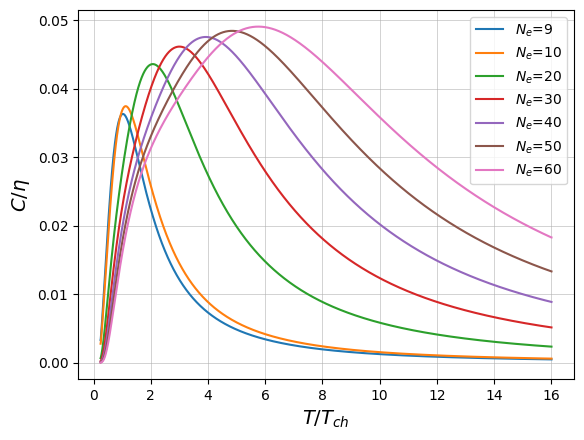

In [9]:
constant=4.06e-21
tu_a =constant*a
x = np.linspace(1e-7,6.5e-6 , 2000)
plt.plot(x/tu_a,np.gradient([internal_energy(temp, np.array(eigenspectrum9atoms)).real  for temp in x]),label="$N_{e}$=9")
plt.plot(x/tu_a,np.gradient([internal_energy(temp, np.array(eigenspectrum10atoms)).real  for temp in x]),label="$N_{e}$=10")
plt.plot(x/tu_a,np.gradient([internal_energy(temp, np.array(eigenspectrum20atoms)).real  for temp in x]),label="$N_{e}$=20")
plt.plot(x/tu_a,np.gradient([internal_energy(temp, np.array(eigenspectrum30atoms)).real  for temp in x]),label="$N_{e}$=30")
plt.plot(x/tu_a,np.gradient([internal_energy(temp, np.array(eigenspectrum40atoms)).real  for temp in x]),label="$N_{e}$=40")
plt.plot(x/tu_a,np.gradient([internal_energy(temp, np.array(eigenspectrum50atoms)).real  for temp in x]),label="$N_{e}$=50")
plt.plot(x/tu_a,np.gradient([internal_energy(temp, np.array(eigenspectrum60atoms)).real  for temp in x]),label="$N_{e}$=60")

plt.xlabel(r"$T/T_{ch}$", fontsize=14)
plt.ylabel(r"$C/\eta$", fontsize=14)
plt.grid(linewidth = 0.4)
plt.legend(loc="best")
plt.savefig('newCfig.png', dpi=1000)
plt.show()

### The Following is a function thats extract the critical tempreature (Simulated Unruh Tempreature)

In [10]:
def simulated_unruh_temp(exp_vals: "np.array"):
    y=np.gradient([internal_energy(temp, exp_vals).real  for temp in x])
    max_ind=np.argmax(y)
    ymax = y[max_ind]
    xmax = x[max_ind]
    T_sim = xmax
    return T_sim

In [11]:
list_exp = [eigenspectrum9atoms,eigenspectrum10atoms,eigenspectrum20atoms,eigenspectrum30atoms,eigenspectrum40atoms,eigenspectrum50atoms,eigenspectrum60atoms]
list_temp = []
for i in range(7):
    unruh_tempreaturs= simulated_unruh_temp(list_exp[i])/tu_a
    list_temp.append(unruh_tempreaturs)
print(list_temp)

[1.0269913281764036, 1.1216199232621238, 2.075791590376469, 3.006306108719385, 3.9289349108051566, 4.843677996633786, 5.758421082462413]


### Number operatore 

In [12]:
def number_op(N):
    return create(N)*destroy(N)

In [13]:
def num_op_eigenvalues(N:'int'):
    eigenvalues_n = np.zeros((N), dtype=float)
    for i in range(N):
        eigenvalues_n[i] += expect(number_op(N),Qobj(hamiltonian_ugen(N-1)).eigenstates()[1][i])
 
    return eigenvalues_n

### Averge number of phononic Exication 

In [14]:
def avrege_N(temp: float, exp_vals: "np.array", exp_vals_1: "np.array"):
    return np.sum(np.exp(-exp_vals/(k_b*temp))*exp_vals_1) / partition_z(temp, exp_vals)

In [15]:
expextvalue_9atom=num_op_eigenvalues(10)
expextvalue_10atom=num_op_eigenvalues(11)
expextvalue_20atom=num_op_eigenvalues(21)
expextvalue_30atom=num_op_eigenvalues(31)
expextvalue_40atom=num_op_eigenvalues(41)
expextvalue_50atom=num_op_eigenvalues(51)
expextvalue_60atom=num_op_eigenvalues(61)

### Averge number of phononic Exication graphs

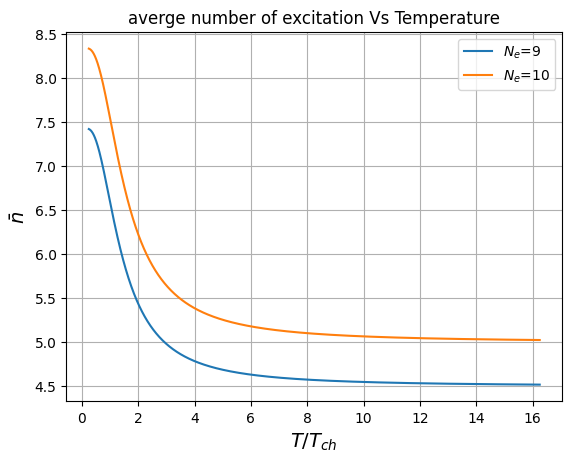

In [16]:
t = np.linspace(1e-7,6.6e-6 , 2000)
plt.plot(t/tu_a,[avrege_N(temp, np.array(eigenspectrum9atoms),expextvalue_9atom).real  for temp in t],label="$N_{e}$=9")
plt.plot(t/tu_a,[avrege_N(temp, np.array(eigenspectrum10atoms),expextvalue_10atom).real  for temp in t],label="$N_{e}$=10")

plt.xlabel(r"$T/T_{ch}$", fontsize=14)
plt.ylabel(r"$\bar{n}$", fontsize=14)

plt.title("averge number of excitation Vs Temperature")
plt.grid()
plt.legend()
plt.show()

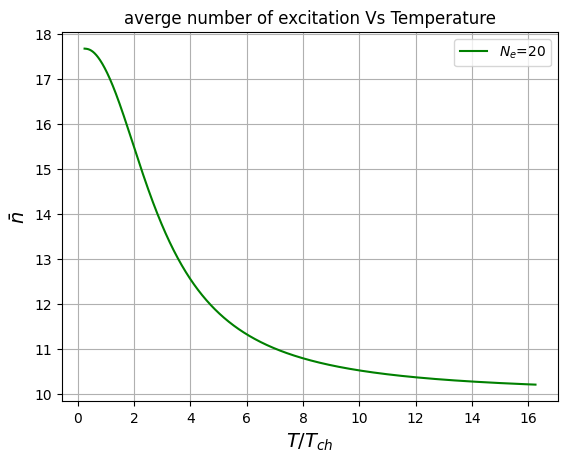

In [17]:
t = np.linspace(1e-7,6.6e-6 , 2000)
plt.plot(t/tu_a,[avrege_N(temp, np.array(eigenspectrum20atoms),expextvalue_20atom).real  for temp in t],color='g',label="$N_{e}$=20")


plt.xlabel(r"$T/T_{ch}$",fontsize=14)
plt.ylabel(r"$\bar{n}$",fontsize=14)

plt.title("averge number of excitation Vs Temperature")

plt.legend()
plt.grid()
plt.show()

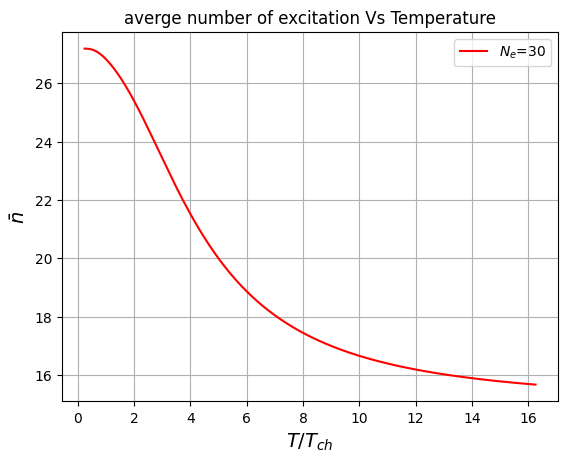

In [18]:
t = np.linspace(1e-7,6.6e-6 , 2000)
plt.plot(t/tu_a,[avrege_N(temp, np.array(eigenspectrum30atoms),expextvalue_30atom).real  for temp in t],color='r',label="$N_{e}$=30")

plt.xlabel(r"$T/T_{ch}$",fontsize=14)
plt.ylabel(r"$\bar{n}$",fontsize=14)

plt.title("averge number of excitation Vs Temperature")
plt.grid()
plt.legend()
plt.show()

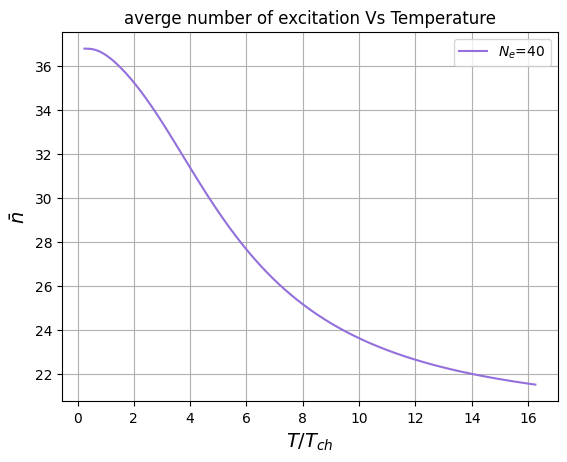

In [19]:
t = np.linspace(1e-7,6.6e-6 , 2000)
plt.plot(t/tu_a,[avrege_N(temp, np.array(eigenspectrum40atoms),expextvalue_40atom).real  for temp in t],color='mediumpurple',label="$N_{e}$=40")


plt.xlabel(r"$T/T_{ch}$",fontsize=14)
plt.ylabel(r"$\bar{n}$",fontsize=14)

plt.title("averge number of excitation Vs Temperature")
plt.grid()
plt.legend()
plt.show()

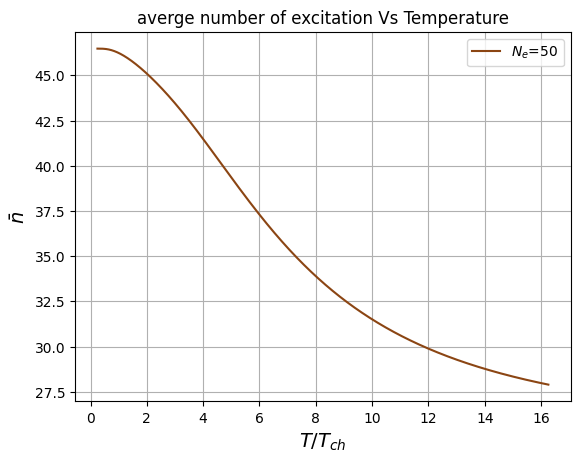

In [20]:
t = np.linspace(1e-7,6.6e-6 , 2000)
plt.plot(t/tu_a,[avrege_N(temp, np.array(eigenspectrum50atoms),expextvalue_50atom).real  for temp in t],color='saddlebrown',label="$N_{e}$=50")

plt.xlabel(r"$T/T_{ch}$",fontsize=14)
plt.ylabel(r"$\bar{n}$",fontsize=14)

plt.title("averge number of excitation Vs Temperature")
plt.grid()
plt.legend()
plt.show()

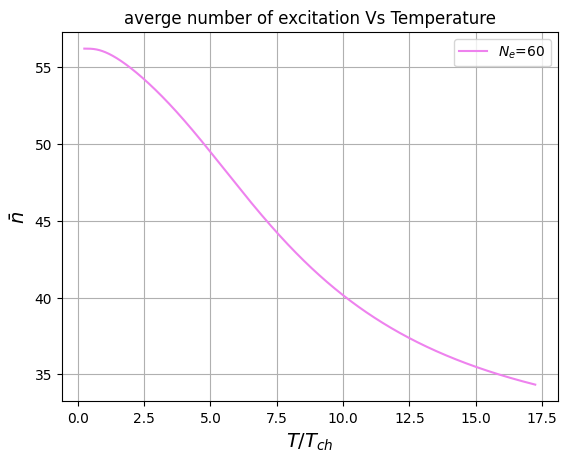

In [21]:
t = np.linspace(1e-7,7e-6 , 2000)
plt.plot(t/tu_a,[avrege_N(temp, np.array(eigenspectrum60atoms),expextvalue_60atom).real  for temp in t],color='violet',label="$N_{e}$=60")


plt.xlabel(r"$T/T_{ch}$",fontsize=14)
plt.ylabel(r"$\bar{n}$",fontsize=14)

plt.title("averge number of excitation Vs Temperature")
plt.grid()
plt.legend()
plt.show()

### The following is a list for the $\bar{n}_{c}$

In [22]:
list_expn=[num_op_eigenvalues(10),num_op_eigenvalues(11),num_op_eigenvalues(21),num_op_eigenvalues(31),num_op_eigenvalues(41),num_op_eigenvalues(51),num_op_eigenvalues(61)]
list_nbar=[]
for i in range(7):
    unruh_tempreaturs= simulated_unruh_temp(list_exp[i])
    list_nbar.append(avrege_N(unruh_tempreaturs,list_exp[i],list_expn[i]))
print(list_nbar)

[6.551641027480014, 7.345599927010377, 15.339238664585965, 23.424394754885093, 31.542063848648915, 39.68414793227368, 47.83065577595851]


### The Theoritical Unruh Tempreature 

In [23]:
def temp_unruh(acceleration):
    return constant*acceleration

### Simulated Unruh Tempreature Graph 
##### Jiazhong Hu et al Data are Extracted using Engauge Digitizer in order to make a qualitative comparison. 

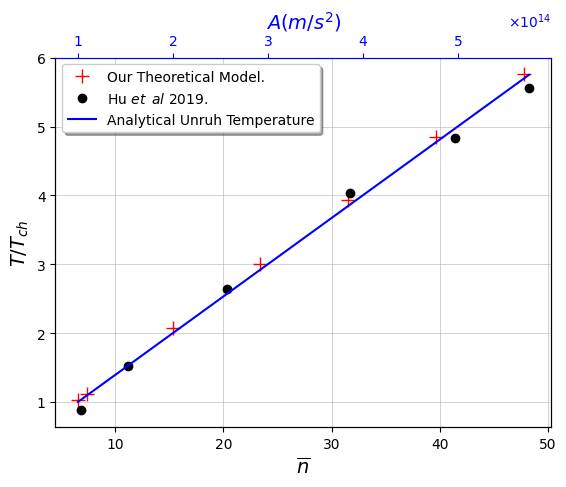

In [44]:
u1=list_temp
v1= list_nbar
p_1x =[6.833,11.217,20.326,31.712,41.421,48.249] # Extracted using Engauge Digitizer in order to make a qualitative comparison.
p_1y =[0.35643e-6,0.61955e-6,1.06922e-6,1.63515e-6,1.96236e-6,2.25742e-6] # Extracted using Engauge Digitizerto make a qualitative comparison.
v12 = np.array(v1)
u12 =np.array(u1)
p_1x2=np.array(p_1x)
p_1y2=np.array(p_1y)

acc = np.linspace(1e14,5.75e14,4)

fig, ax1 = plt.subplots()

# DIFFERENT OPTIONS THAT CAN MAKE THE PLOT CLEARER
plot1 = ax1.plot(v12,u12 ,color='r',marker = '+', linestyle='None', markersize = 10.0, label="Our Theoretical Model.")   
plot2 = ax1.plot(p_1x2,p_1y2/tu_a ,color='k', marker = 'o', linestyle='None', markersize = 6.0, label="Hu $\it{et}\,\,\,\it{al}$ 2019." )
ax1.set_xlabel(r"$\overline{n}$",fontsize=14)
ax1.set_ylabel(r"$T/T_{ch}$",fontsize=14)

ax2 = ax1.twiny()
ax2.set_xlabel(r'$A(m/s^{2}$)',fontsize=14, color = 'b')
ax2.spines['top'].set_color('b')
ax2.tick_params(axis='x', colors="b")
# THIS LINE GIVES NICER LOOK TO THE SCIENTIFIC NUMBER
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0, 0), useMathText=True)
plot3 = ax2.plot(acc, temp_unruh(acc)/tu_a, color='b', markersize = 10.0, label='Analytical Unruh Temperature')

# DEFINE LEGENDS ONCE
# added these three lines

plot = plot1 + plot2 + plot3
labs = [l.get_label() for l in plot]
ax1.legend(plot,labs,loc='upper left',fontsize=10, frameon=True, fancybox=True, shadow=True)
ax1.grid(linewidth = 0.4)
# plt.legend(["Nature paper","Critical Approximation Approach" , 'Analytical Unruh Temperature'],loc="upper left") 
plt.savefig("main_graph2.png", dpi=1000)
plt.show()

### Linear Fitting

In [45]:
coeff = np.polyfit(v12,u12,1)
print(coeff)

[0.11465788 0.29613575]


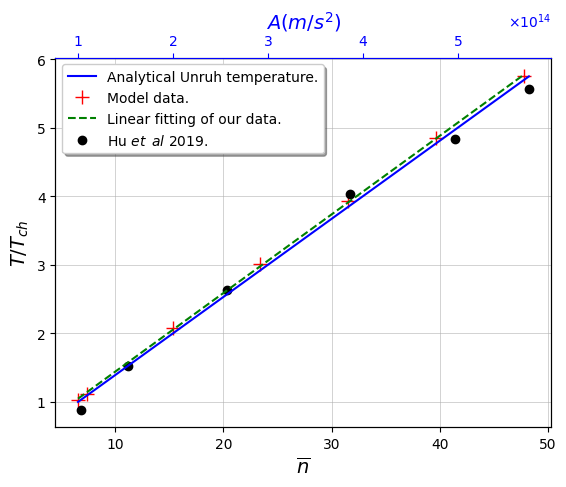

In [46]:
fit_line = np.poly1d(coeff)
fig, ax1 = plt.subplots()
x_bar=np.linspace(0,50,100)

# DIFFERENT OPTIONS THAT CAN MAKE THE PLOT CLEARER
plot1 = ax1.plot(v12,u12 ,color='r',marker = '+', linestyle='None', markersize = 10.0, label="Model data.")   
plot2 = ax1.plot(p_1x2,p_1y2/tu_a ,color='k', marker = 'o', linestyle='None', markersize = 6.0, label="Hu $\it{et}\,\,\,\it{al}$ 2019." )
plot3 = ax1.plot(v12, fit_line(v12), color='g', markersize=12.0, linestyle='--', label= "Linear fitting of our data.")
ax1.set_xlabel(r"$\overline{n}$",fontsize=14)
ax1.set_ylabel(r"$T/T_{ch}$",fontsize=14)

ax2 = ax1.twiny()
ax2.set_xlabel(r'$A(m/s^{2}$)',fontsize=14, color = 'b')
ax2.spines['top'].set_color('b')
ax2.tick_params(axis='x', colors="b")
#THIS LINE GIVES NICER LOOK TO THE SCIENTIFIC NUMBER
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0, 0), useMathText=True)
plot4 = ax2.plot(acc, temp_unruh(acc)/tu_a, color='b', markersize = 10.0, label='Analytical Unruh temperature.')
 #DEFINE LEGENDS ONCE
 #added these three lines

plot =plot4+plot1 + plot3 + plot2
labs = [l.get_label() for l in plot]
ax1.legend(plot,labs,loc='upper left',fontsize=10, frameon=True, fancybox=True, shadow=True)
ax1.grid(linewidth = 0.4)
# plt.legend(["Nature paper","Critical Approximation Approach" , 'Analytical Unruh Temperature'],loc="upper left") 
plt.savefig("main_graph2fit.png", dpi=1000)
plt.show()

### Calculating the optimal $\bar{n}_{ch}$ in order to estimate the comparing slope

In [47]:
# this number comming from Hu et al. derived formula for the limite n_bar >>> 1
n_bar_ch = 1/np.pi

   ### fitting  effective slope and precision

In [48]:
slope_c = coeff[0]+coeff[1]/n_bar_ch
print("critical slope is =",slope_c)

critical slope is = 1.0449957694295313


In [49]:
precision=slope_c*constant*c
print("precision is =" ,precision)

precision is = 1.272804847165169e-12


   ### fitting  effective slope and precision of Hu et al. 

In [57]:
coeff2 = np.polyfit(p_1x2,p_1y2/tu_a,1)
coeff2

array([0.11202747, 0.26019398])

In [62]:
slope_c2 = coeff2[0]+coeff2[1]/n_bar_ch
print("critical slope2 is =",slope_c2,"k.s")

critical slope2 is = 0.9294509695714246 k.s


In [63]:
precision2=slope_c2*constant*c
print("precision2 is =" ,precision,"k.s")

precision2 is = 1.272804847165169e-12 k.s


#### We get a precision less then the one reported in Hu et al. paper because we used just seven data points.

## License
Copyright © 2022, [Constantine Quantum Technologies](https://cqtech.org). Released under the [Apache License 2.0](LICENSE).